In [1]:
# trying to incorporate some ml stuff to this nba data now, too

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
lebron = pd.read_csv('data/NBA/1_lebron_james_shot_chart_1_2023.csv')
james = pd.read_csv('data/NBA/2_james_harden_shot_chart_2023.csv')
stephen = pd.read_csv('data/NBA/3_stephen_curry_shot_chart_2023.csv')

print(lebron.shape)
print(james.shape)
print(stephen.shape)

(1533, 15)
(1025, 15)
(1434, 15)


In [4]:
lebron.dtypes

top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
dtype: object

In [5]:
# let's try to use the positional data from 'top' and 'left' to create a 
# model that predicts whether lebron james will make a shot or not

# first let's select the top and left columns for X_train
# and shots made for the y_train

X_train = lebron.iloc[0:1300,0:2].to_numpy().astype('int16')
y_train = lebron.iloc[0:1300,5].to_numpy().astype('int8')

X_valid = lebron.iloc[1300:1533,0:2].to_numpy().astype('int16')
y_valid = lebron.iloc[1300:1533,5].to_numpy().astype('int8')


In [6]:
# now let's scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.617076  , -0.31657385],
       [ 0.63223507,  0.29984255],
       [-0.07847487, -0.6688118 ],
       ...,
       [ 1.546005  , -0.87795308],
       [ 1.70845299, -0.21750693],
       [ 1.64753499, -0.38261847]])

In [7]:
X_train.shape

(1300, 2)

In [8]:
# time to create a model
from tensorflow.keras import initializers
from tensorflow.keras import layers

tf.keras.backend.clear_session()

init = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[2]),
    tf.keras.layers.Dense(10, kernel_initializer=init, activation='relu'),
    tf.keras.layers.Dense(10, kernel_initializer=init, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 162 (648.00 Byte)
Trainable params: 162 (648.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
41/41 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.6000 - val_loss: 29.7863 - val_accuracy: 0.6567
Epoch 2/50
41/41 [==============================] - 0s 769us/step - loss: 0.6734 - accuracy: 0.6146 - val_loss: 24.5200 - val_accuracy: 0.6996
Epoch 3/50
41/41 [==============================] - 0s 689us/step - loss: 0.6600 - accuracy: 0.6315 - val_loss: 20.4726 - val_accuracy: 0.6867
Epoch 4/50
41/41 [==============================] - 0s 671us/step - loss: 0.6514 - accuracy: 0.6362 - val_loss: 16.2624 - val_accuracy: 0.6438
Epoch 5/50
41/41 [==============================] - 0s 666us/step - loss: 0.6476 - accuracy: 0.6469 - val_loss: 16.6435 - val_accuracy: 0.6738
Epoch 6/50
41/41 [==============================] - 0s 664us/step - loss: 0.6442 - accuracy: 0.6469 - val_loss: 10.8794 - val_accuracy: 0.6781
Epoch 7/50
41/41 [==============================] - 0s 659us/step - loss: 0.6405 - accuracy: 0.6446 - val_loss: 18.8212 - val_accuracy: 0.5021
E

<Axes: >

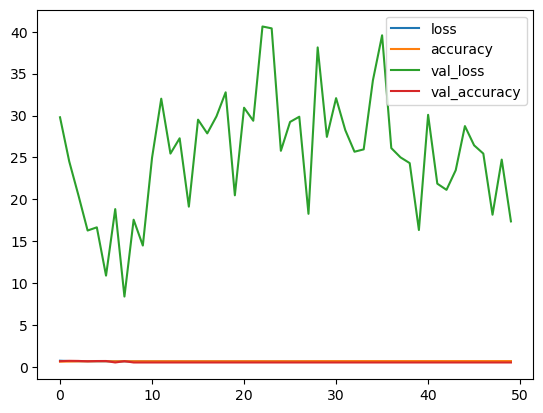

In [12]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()